# Assignment 3: Beginners: Cancer Death Rate

#### About the data

The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

        TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
        avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
        avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
        incidenceRate: Mean per capita (100,000) cancer diagoses(a)
        medianIncome: Median income per county (b)
        popEst2015: Population of county (b)
        povertyPercent: Percent of populace in poverty (b)
        studyPerCap: Per capita number of cancer-related clinical trials per county (a)
        binnedInc: Median income per capita binned by decile (b)
        MedianAge: Median age of county residents (b)
        MedianAgeMale: Median age of male county residents (b)
        MedianAgeFemale: Median age of female county residents (b)
        Geography: County name (b)
        AvgHouseholdSize: Mean household size of county (b)
        PercentMarried: Percent of county residents who are married (b)
        PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
        PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
        PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
        PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
        PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
        PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
        PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
        PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
        PctPrivateCoverage: Percent of county residents with private health coverage (b)
        PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
        PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
        PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
        PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
        PctWhite: Percent of county residents who identify as White (b)
        PctBlack: Percent of county residents who identify as Black (b)
        PctAsian: Percent of county residents who identify as Asian (b)
        PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
        PctMarriedHouseholds: Percent of married households (b)
        BirthRate: Number of live births relative to number of women in county (b)

## Task 1
#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


##### Load the data and display first 5 rows

In [2]:
data = pd.read_csv('CancerData.csv')
data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


#### Perform Exploratory Data Analysis


In [3]:
data.shape

(3051, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [5]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [7]:
data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,...,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,...,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,...,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,...,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,...,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,...,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


#### Handling missing values

In [8]:
data.drop('PctSomeCol18_24', inplace = True, axis = 'columns')

In [9]:
'''fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True, ax = ax, linewidths = 0.5)'''

'fig, ax = plt.subplots(figsize = (18, 18))\nsns.heatmap(data.corr(), annot = True, ax = ax, linewidths = 0.5)'

<AxesSubplot:xlabel='PctEmployed16_Over', ylabel='PctPublicCoverage'>

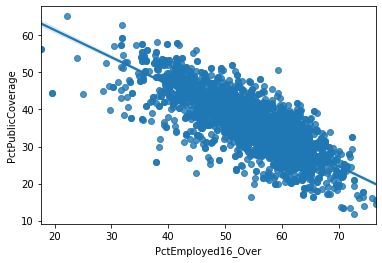

In [10]:
sns.regplot(data['PctEmployed16_Over'],data['PctPublicCoverage'] )

There seems to be a very high negative correlation between PctEmployed16_Over and PctPublicCoverage features.We can thus use PctPublicCoverage to fill out the missing values of PctEmployed16_Over by training a simple linear regression model

In [11]:
data1 = data.dropna(axis = 0)
reg1 = LinearRegression()
reg1.fit(X = data1['PctPublicCoverage'].values.reshape(-1,1),y = data1['PctEmployed16_Over'].values.reshape(-1,1))

LinearRegression()

In [12]:
for i in data.loc[data['PctEmployed16_Over'].isnull()].index:
    data['PctEmployed16_Over'][i] = reg1.predict(data['PctPublicCoverage'][i].reshape(1,-1))
    #print(data['PctEmployed16_Over'][i])

<AxesSubplot:xlabel='PctPrivateCoverageAlone', ylabel='PctPublicCoverageAlone'>

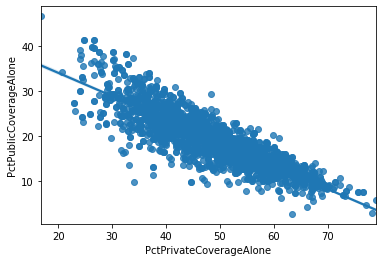

In [13]:
sns.regplot(x = data['PctPrivateCoverageAlone'], y = data['PctPublicCoverageAlone'])

Similarly we can see that PctPrivateCoverageAlone and PctPublicCoverageAlone features are highly correlated. We will thus use a linear model to fill out PctPrivateCoverageAlone using public coverage

In [14]:
reg2 = LinearRegression()
reg2.fit(X = data1['PctPublicCoverageAlone'].values.reshape(-1,1),y = data1['PctPrivateCoverageAlone'].values.reshape(-1,1))

LinearRegression()

In [15]:
for i in data.loc[data['PctPrivateCoverageAlone'].isnull()].index:
    data['PctPrivateCoverageAlone'][i] = reg2.predict(data['PctPublicCoverageAlone'][i].reshape(1,-1))
    #print(data['PctPrivateCoverageAlone'][i])

In [16]:
data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [17]:
data.drop('Geography', axis = 'columns', inplace = True)

In [18]:
data['binnedInc'] = data['binnedInc'].map(lambda x: (float(x.split(',')[0][1:]) + float(x.split(',')[1][:-1]))/2)

In [19]:
data['binnedInc'].head()

0    49534.00
1    58020.05
2    38888.25
3    28429.05
4    38888.25
Name: binnedInc, dtype: float64

#### Separate the Input and Target Features of the data¶


In [20]:
x = data.drop('TARGET_deathRate', axis = 'columns')
y = data['TARGET_deathRate']
x.shape

(3051, 31)

#### Split the data into Train and Test Sets¶


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.1)
x_train.shape

(2745, 31)

In [22]:
y_test.shape

(306,)

### Handling Outliers

In [23]:
x_train.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2745.000000,2745.000000,2745.000000,2745.000000,2.745000e+03,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,...,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,574.994361,177.134791,449.101436,46906.959199,9.542355e+04,16.879053,161.582667,48637.155701,44.229654,39.585209,...,48.594405,41.325027,36.279709,19.203643,84.002411,9.138563,1.191383,1.865164,51.305778,5.586182
std,1286.034301,459.160432,53.019420,11896.111111,2.849189e+05,6.357607,553.526207,16559.930132,38.505270,5.174985,...,9.727827,9.365611,7.746463,6.051959,16.215887,14.736080,2.364909,3.292749,6.545633,1.943702
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,28429.050000,22.300000,22.400000,...,16.436929,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000
25%,80.000000,29.000000,421.900000,38742.000000,1.238500e+04,12.200000,0.000000,38888.250000,37.800000,36.400000,...,41.777964,34.500000,31.000000,14.900000,78.020517,0.606174,0.261901,0.289896,47.707929,4.493889
50%,169.000000,61.000000,453.549422,45049.000000,2.606600e+04,15.900000,0.000000,43962.700000,41.000000,39.500000,...,48.714895,41.300000,36.300000,18.700000,90.337093,2.222103,0.557313,0.786040,51.743408,5.372695
75%,506.000000,147.000000,481.000000,52410.000000,6.797900e+04,20.500000,89.484391,52796.000000,43.900000,42.500000,...,55.500000,47.700000,41.400000,23.100000,95.587552,10.240502,1.198810,2.062534,55.450875,6.463150
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,93564.750000,525.600000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165


In [24]:
def HandleOutliers(dframe, cols):
    for i in cols:
        print(i)
        limit = dframe[i].mean() + 2*dframe[i].std()#Any data point that lies above 2 standard deviations will be considered as an outlier
        print(dframe.loc[dframe[i] > limit, i].shape[0])
        dframe.loc[dframe[i] > limit, i] = dframe[i].mean()

In [25]:
HandleOutliers(x_train, x_train.columns)

avgAnnCount
64
avgDeathsPerYear
70
incidenceRate
36
medIncome
121
popEst2015
67
povertyPercent
113
studyPerCap
80
binnedInc
257
MedianAge
21
MedianAgeMale
96
MedianAgeFemale
56
AvgHouseholdSize
28
PercentMarried
24
PctNoHS18_24
103
PctHS18_24
77
PctBachDeg18_24
97
PctHS25_Over
50
PctBachDeg25_Over
117
PctEmployed16_Over
33
PctUnemployed16_Over
84
PctPrivateCoverage
19
PctPrivateCoverageAlone
47
PctEmpPrivCoverage
67
PctPublicCoverage
76
PctPublicCoverageAlone
91
PctWhite
0
PctBlack
180
PctAsian
81
PctOtherRace
116
PctMarriedHouseholds
50
BirthRate
108


In [26]:
x_train.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,...,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,438.108255,123.302527,447.139379,45346.066690,63158.852709,16.160850,91.404867,44430.819914,40.919061,39.140758,...,48.209174,40.792778,35.777435,18.669993,84.002411,6.270496,0.897786,1.356103,51.018918,5.364642
std,606.122172,168.421455,48.585248,8878.795646,96650.284494,5.166813,197.430911,8214.752525,5.139228,4.552618,...,9.255570,8.698024,7.102437,5.235383,16.215887,8.631876,1.033974,1.553533,6.176668,1.521113
min,6.000000,3.000000,211.100000,22640.000000,827.000000,3.200000,0.000000,28429.050000,22.300000,22.400000,...,16.436929,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000
25%,80.000000,29.000000,421.900000,38742.000000,12385.000000,12.200000,0.000000,38888.250000,37.800000,36.400000,...,41.777964,34.500000,31.000000,14.900000,78.020517,0.606174,0.261901,0.289896,47.707929,4.493889
50%,169.000000,61.000000,453.549422,45049.000000,26066.000000,15.900000,0.000000,43962.700000,41.000000,39.500000,...,48.594405,41.300000,36.279709,18.700000,90.337093,2.222103,0.557313,0.786040,51.527197,5.372695
75%,506.000000,147.000000,479.400000,51237.000000,67979.000000,19.600000,89.484391,49534.000000,43.900000,42.000000,...,55.100000,47.100000,40.800000,22.400000,95.587552,9.138563,1.191383,1.865164,55.213319,6.281958
max,3142.000000,1086.000000,554.700000,70535.000000,660367.000000,29.500000,1253.132832,58020.050000,65.300000,49.900000,...,67.900000,60.000000,51.600000,31.300000,100.000000,38.388841,5.881695,8.356721,64.394003,9.448819


In [27]:
HandleOutliers(x, x.columns)

avgAnnCount
76
avgDeathsPerYear
85
incidenceRate
39
medIncome
132
popEst2015
79
povertyPercent
126
studyPerCap
89
binnedInc
282
MedianAge
24
MedianAgeMale
107
MedianAgeFemale
67
AvgHouseholdSize
31
PercentMarried
29
PctNoHS18_24
117
PctHS18_24
85
PctBachDeg18_24
105
PctHS25_Over
58
PctBachDeg25_Over
130
PctEmployed16_Over
35
PctUnemployed16_Over
96
PctPrivateCoverage
19
PctPrivateCoverageAlone
51
PctEmpPrivCoverage
76
PctPublicCoverage
86
PctPublicCoverageAlone
101
PctWhite
0
PctBlack
200
PctAsian
93
PctOtherRace
126
PctMarriedHouseholds
61
BirthRate
121


In [28]:
x_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
321,43.000000,20.0,429.400000,37113.000000,10312.0,23.9,0.000000,35815.950000,33.6,34.2,...,38.9,26.100000,37.5,24.5,72.431030,24.752475,0.807459,0.980486,47.602371,6.906534
1779,314.000000,146.0,463.600000,36923.000000,52419.0,22.0,19.077052,35815.950000,42.2,40.4,...,45.7,40.200000,38.7,16.7,90.970488,3.093076,0.397276,1.271283,55.342372,4.011186
141,306.000000,139.0,443.300000,51958.000000,67357.0,15.8,0.000000,52796.000000,35.5,34.0,...,46.9,42.600000,31.4,19.0,92.214318,2.096262,0.976237,2.445891,53.952855,8.977720
471,357.000000,127.0,469.300000,46906.959199,101095.0,10.7,0.000000,48637.155701,34.6,34.3,...,50.9,43.200000,27.8,15.8,84.026493,0.997110,1.441078,0.712221,57.492443,4.854021
2886,1962.667684,32.0,453.549422,68777.000000,20364.0,7.6,0.000000,48637.155701,37.9,36.9,...,67.3,41.325027,24.7,12.0,97.254805,0.537210,0.473139,0.359783,59.422975,6.386702


### Build any Machine Learning Model of your choice¶


In [29]:
#Using random forest as first model

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

### Evaluate your model with various Evaluation Metrics


In [30]:

rfr_score = r2_score(y_test, rfr_pred)
rfr_score

0.729778091546063

In [31]:
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_mse

192.37024096078432

#### Try out other Machine Learning Models and Evaluate them


In [36]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
etr_pred = etr.predict(x_test)

In [37]:
etr_score = r2_score(y_test, etr_pred)
etr_score

0.7730024609175751

In [38]:
etr_mse = mean_squared_error(y_test, etr_pred)
etr_mse

161.59893008169942

In [341]:
lrg = LinearRegression()
lrg.fit(x_train, y_train)
lrg_pred = lrg.predict(x_test)

In [342]:
lrg_score = r2_score(y_test, lrg_pred)
lrg_score

0.33680643634039775

In [343]:
lrg_mse = mean_squared_error(y_test, lrg_pred)
lrg_mse

472.12569245319526

In [344]:
drg = DecisionTreeRegressor()
drg.fit(x_train, y_train)
drg_pred = drg.predict(x_test)

In [345]:
drg_score = r2_score(y_test, drg_pred)
drg_score

0.40919709393486825

In [346]:
drg_mse = mean_squared_error(y_test, drg_pred)
drg_mse

420.5909803921569

In [347]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge_preds = ridge.predict(x_test)

We can see that Random Forest Regressor had the best r2 score and the lowest mse too. We will now try to improve the model using hyperparametric tuning

In [348]:
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_mse

472.1354274462966

In [349]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_preds = ridge.predict(x_test)

In [350]:
gbr_mse = mean_squared_error(y_test, gbr_preds)
gbr_mse

472.1354274462966

## Task 4


### Perform Hyperparameter Tuning


In [66]:

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [69]:
rf_random.best_score_

0.666030819265958

In [351]:
rfr_tuned = RandomForestRegressor(bootstrap = False, max_depth = 100, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 2,n_estimators = 230 )
rfr_tuned.fit(x_train, y_train)
rfr_tuned_pred = rfr_tuned.predict(x_test)

In [44]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [60, 70, 80, 90, 100, 120]}
et = ExtraTreesRegressor()
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
et_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.9s finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [60, 70, 80, 90, 100,
                                                         120]},
                   random_state=42, verbose=2)

In [45]:
et_random.best_score_

0.6986271932431914

In [47]:
et_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [48]:
et_tuned = ExtraTreesRegressor(n_estimators = 80, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto', max_depth = 50, bootstrap = False)
et_tuned.fit(x_train, y_train)
et_preds = et_tuned.predict(x_test)

In [49]:
et_mse = mean_squared_error(y_test, et_preds)
et_mse

161.54342234292733

### Evaluate your model¶


In [352]:
rfr_tuned_score = r2_score(y_test, rfr_tuned_pred)
rfr_tuned_score

0.7643084220167402

In [353]:
rfr_mse = mean_squared_error(y_test, rfr_tuned_pred)
rfr_mse

167.78819270605516

### Task 5


#### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [50]:
!pip install Boruta


In [354]:
from boruta import BorutaPy


In [355]:
rfr_boruta = RandomForestRegressor(bootstrap = False, max_depth = 100, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 2,n_estimators = 230 )
boruta_selector = BorutaPy(rfr_boruta, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(x_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	30
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	30
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	30
Tentative: 	0
Rejected: 	1


BorutaPy finished running.

Iteration: 	11 / 100
Confirmed: 	30
Tentative: 	0
Rejected: 	1


BorutaPy(estimator=RandomForestRegressor(bootstrap=False, max_depth=100,
                                         max_features='sqrt', n_estimators=7,
                                         random_state=RandomState(MT19937) at 0x1F92029C940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1F92029C940, verbose=2)

In [356]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  30


In [357]:
selected_rf_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,avgAnnCount,1
28,PctOtherRace,1
27,PctAsian,1
26,PctBlack,1
25,PctWhite,1
24,PctPublicCoverageAlone,1
23,PctPublicCoverage,1
22,PctEmpPrivCoverage,1
21,PctPrivateCoverageAlone,1
20,PctPrivateCoverage,1


In [358]:
x_selected_train = boruta_selector.transform(np.array(x_train))
x_selected_test = boruta_selector.transform(np.array(x_test))

In [359]:
rfr_fs = RandomForestRegressor(bootstrap = False, max_depth = 100, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 2,n_estimators = 230 )
rfr_fs.fit(x_selected_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      n_estimators=230)

In [360]:
final_pred = rfr_fs.predict(x_selected_test)
final_mse = mean_squared_error(y_test, final_pred)
final_mse

160.83512316740192

In [361]:
final_score = r2_score(y_test, final_pred)
final_score

0.7740753782307777

In [50]:
test_data = pd.read_csv('Test.csv')

In [51]:
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,...,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,...,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,...,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,...,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [52]:
test_data.drop(['Geography', 'PctSomeCol18_24', 'studyPerCap'], inplace = True, axis = 'columns')

In [53]:
def HandleOutliers(cols):
    for i in cols:
        print(i)
        limit = test_data[i].mean() + 2*test_data[i].std()#Any data pont that lies above 3 standard deviations will be considered as an outlier
        print(test_data.loc[test_data[i] > limit, i].shape[0])
        test_data.loc[test_data[i] > limit, i] = test_data[i].median()

In [54]:
test_data['binnedInc'] = test_data['binnedInc'].map(lambda x: (float(x.split(',')[0][1:]) + float(x.split(',')[1][:-1]))/2)

In [55]:
HandleOutliers(test_data.columns)

avgAnnCount
19
avgDeathsPerYear
20
incidenceRate
12
medIncome
37
popEst2015
17
povertyPercent
33
binnedInc
84
MedianAge
10
MedianAgeMale
28
MedianAgeFemale
16
AvgHouseholdSize
13
PercentMarried
7
PctNoHS18_24
31
PctHS18_24
25
PctBachDeg18_24
39
PctHS25_Over
10
PctBachDeg25_Over
33
PctEmployed16_Over
5
PctUnemployed16_Over
26
PctPrivateCoverage
4
PctPrivateCoverageAlone
9
PctEmpPrivCoverage
18
PctPublicCoverage
9
PctPublicCoverageAlone
26
PctWhite
0
PctBlack
48
PctAsian
16
PctOtherRace
26
PctMarriedHouseholds
16
BirthRate
31


In [56]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: int64

In [57]:
test_data['PctPrivateCoverageAlone'] = test_data['PctPrivateCoverageAlone'].fillna(test_data['PctPrivateCoverageAlone'].mean())

In [58]:
test_data['PctEmployed16_Over'] = test_data['PctEmployed16_Over'].fillna(test_data['PctEmployed16_Over'].mean())

In [59]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [60]:
test_data.shape

(762, 30)

In [61]:
x.drop('studyPerCap', inplace = True, axis = 'columns')

In [62]:
et_tuned.fit(x, y)

ExtraTreesRegressor(max_depth=50, min_samples_split=5, n_estimators=80)

In [64]:
preds = et_tuned.predict(test_data)
preds[:10]

array([142.51947917, 208.14427083, 157.55125   , 151.93854167,
       154.710625  , 175.37083333, 184.1465625 , 164.693125  ,
       160.92125   , 180.64822917])

In [65]:
predictions = pd.DataFrame({'prediction':preds})
predictions.head()

,prediction
0,142.519479
1,208.144271
2,157.551250
3,151.938542
4,154.710625


In [383]:
predictions.shape

(762, 1)

In [66]:
predictions.to_csv('Cancer-Predicitons.csv', index = False)

In [379]:
test_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,485.296436,137.295276,444.626593,45328.089895,7.771721e+04,16.175459,43980.860696,40.748819,39.150131,41.756168,...,47.264898,40.067323,36.250919,19.012861,82.788278,5.698876,0.998725,1.619248,50.597691,5.464711
std,762.051401,231.092442,50.268878,9154.581238,1.548227e+05,5.320317,8010.674524,5.372748,4.830880,5.147273,...,8.639527,9.137779,7.956412,5.725776,17.320289,8.470635,1.234313,2.028185,6.365098,1.546873
min,7.000000,3.000000,201.300000,24707.000000,1.337000e+03,4.000000,28429.050000,23.300000,22.800000,22.800000,...,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,68.000000,26.000000,417.375000,38730.500000,1.075350e+04,12.300000,38888.250000,37.500000,36.225000,38.900000,...,42.100000,33.525000,30.800000,14.925000,76.468705,0.613335,0.236915,0.297753,47.607275,4.608878
50%,162.250000,60.000000,453.549422,45232.250000,2.610725e+04,15.800000,46611.300000,41.100000,39.800000,42.325000,...,47.805700,40.600000,36.600000,18.925000,89.464327,2.115264,0.538562,0.846459,51.330901,5.366956
75%,465.750000,130.000000,477.550000,50750.500000,6.277150e+04,19.600000,49534.000000,43.975000,42.200000,45.200000,...,52.375000,46.475000,41.800000,22.875000,95.162772,6.417711,1.222936,2.134961,54.788999,6.283672
max,4568.000000,1562.000000,560.400000,70874.000000,1.024198e+06,29.900000,58020.050000,57.300000,50.500000,52.800000,...,66.200000,59.800000,52.800000,32.400000,99.693045,36.930881,7.185751,10.205038,64.061410,9.862735


In [380]:
x_train.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,...,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,438.108255,123.302527,447.139379,45346.066690,63158.852709,16.160850,91.404867,44430.819914,40.919061,39.140758,...,48.209174,40.792778,35.777435,18.669993,84.002411,6.270496,0.897786,1.356103,51.018918,5.364642
std,606.122172,168.421455,48.585248,8878.795646,96650.284494,5.166813,197.430911,8214.752525,5.139228,4.552618,...,9.255570,8.698024,7.102437,5.235383,16.215887,8.631876,1.033974,1.553533,6.176668,1.521113
min,6.000000,3.000000,211.100000,22640.000000,827.000000,3.200000,0.000000,28429.050000,22.300000,22.400000,...,16.436929,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000
25%,80.000000,29.000000,421.900000,38742.000000,12385.000000,12.200000,0.000000,38888.250000,37.800000,36.400000,...,41.777964,34.500000,31.000000,14.900000,78.020517,0.606174,0.261901,0.289896,47.707929,4.493889
50%,169.000000,61.000000,453.549422,45049.000000,26066.000000,15.900000,0.000000,43962.700000,41.000000,39.500000,...,48.594405,41.300000,36.279709,18.700000,90.337093,2.222103,0.557313,0.786040,51.527197,5.372695
75%,506.000000,147.000000,479.400000,51237.000000,67979.000000,19.600000,89.484391,49534.000000,43.900000,42.000000,...,55.100000,47.100000,40.800000,22.400000,95.587552,9.138563,1.191383,1.865164,55.213319,6.281958
max,3142.000000,1086.000000,554.700000,70535.000000,660367.000000,29.500000,1253.132832,58020.050000,65.300000,49.900000,...,67.900000,60.000000,51.600000,31.300000,100.000000,38.388841,5.881695,8.356721,64.394003,9.448819


In [147]:
test_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,393.115442,102.679356,445.167829,45472.925197,54984.321335,16.314810,44261.470474,40.692964,39.421349,41.891193,...,47.617131,40.403338,36.387706,19.307620,82.788278,5.097881,0.852590,1.380734,50.800441,5.449972
std,550.235500,126.557020,50.985520,9301.019404,82048.552235,5.466284,8141.590419,5.225626,5.176137,5.313484,...,9.077516,9.536457,8.110993,6.074947,17.320289,6.951703,0.919264,1.518869,6.610316,1.514467
min,7.000000,3.000000,201.300000,24707.000000,1337.000000,4.000000,28429.050000,23.300000,22.800000,22.800000,...,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,68.000000,26.000000,417.375000,38730.500000,10753.500000,12.300000,38888.250000,37.500000,36.225000,38.900000,...,42.100000,33.525000,30.800000,14.925000,76.468705,0.613335,0.236915,0.297753,47.607275,4.608878
50%,162.250000,60.000000,453.549422,45232.250000,26107.250000,15.800000,46611.300000,41.100000,39.700000,42.300000,...,47.714188,40.600000,36.500000,18.925000,89.464327,2.115264,0.538562,0.846459,51.280520,5.366956
75%,449.750000,120.000000,478.025000,50814.000000,56757.500000,19.775000,49534.000000,44.100000,42.700000,45.375000,...,53.000000,47.100000,42.100000,23.175000,95.162772,7.213198,1.131917,2.009061,55.072080,6.256078
max,2459.000000,793.000000,564.500000,71546.000000,538388.000000,30.600000,58020.050000,54.000000,52.400000,55.000000,...,70.300000,63.800000,56.500000,34.700000,99.693045,30.327072,4.102125,7.244044,67.256637,9.708738
